# Pandas method

In [4]:
import pandas as pd
url = "https://fallout.fandom.com/wiki/Fallout:_New_Vegas_weapons"
table_list = pd.read_html(url, attrs = {'class': 'va-table va-table-full va-table-center sortable'})

In [15]:
for table in table_list:
    print(table.iloc[0,1], table.shape)

.357 Magnum revolver² (18, 19)
Anti-materiel rifle¹(GRA) (25, 19)
.45 Auto SMG (8, 19)
Caravan shotgun (9, 19)
K9000 cyberdog gun¹ (5, 19)
Alien blaster¹ (17, 19)
Gauss rifle² (15, 19)
Arc welder (12, 19)
25mm grenade APW (14, 18)
Dynamite² (12, 14)
Bottlecap mine² (14, 12)
Bowie knife² (33, 16)
9 iron (21, 16)
Proton throwing axe (7, 16)
Ballistic fist (33, 16)
Big Mountain Transportalponder! (4, 19)
Deathclaw gauntlet (15, 19)
Arcade Gannon's Ripper (17, 19)


Dont need the last three tables,, they are unavailable weapons, or just gadgets.

Most tables have the same columns, these are actual non explosive, non placed weapons. The rest, (melee weapons), are missing weapon spread, ammo type, and mag size.

Let's combine all these into one single table.

In [48]:
col_names_guns = ['name', 
             'dmg', 
             'dps', 
             'rof', 
             'crit_mult', 
             'crit_dmg', 
             'ap_cost', 
             'dpap', 
             'spread', 
             'ammo', 
             'mag_size', 
             'durability', 
             'weight',
             'value',
             'vtw',
             'skill',
             'strength']

col_names_melee = ['name', 
             'dmg', 
             'dps', 
             'rof', 
             'crit_mult', 
             'crit_dmg', 
             'ap_cost', 
             'dpap', 
             'durability', 
             'weight',
             'value',
             'vtw',
             'skill',
             'strength']

weapon_types =['Pistol', 'Rifle', 'SMG', 'Shotgun', 'Heavy', 'Energy Pistol', 'Energy Rifle', 'Energy Heavy', 'Bladed', 'Blunt', 'Thrown', 'Unarmed']
i = 0
combined_table = pd.DataFrame()
for table in table_list[:-3]:
    new_table = table.drop(['Image', 'Base ID'], axis=1)
    if new_table.shape[1] == 17:
        new_table.columns = col_names_guns
        print(new_table.iloc[0]['name'], new_table.shape[1], weapon_types[i])
        new_table['type'] = weapon_types[i]
        i+=1
        combined_table = pd.concat([combined_table, new_table])
    elif new_table.shape[1] == 14:
        new_table.columns = col_names_melee
        print(new_table.iloc[0]['name'], new_table.shape[1], weapon_types[i])
        new_table['type'] = weapon_types[i]
        i+=1
        combined_table = pd.concat([combined_table, new_table])

combined_table = combined_table.set_index('name')
combined_table

.357 Magnum revolver² 17 Pistol
Anti-materiel rifle¹(GRA) 17 Rifle
.45 Auto SMG 17 SMG
Caravan shotgun 17 Shotgun
K9000 cyberdog gun¹ 17 Heavy
Alien blaster¹ 17 Energy Pistol
Gauss rifle² 17 Energy Rifle
Arc welder 17 Energy Heavy
Bowie knife² 14 Bladed
9 iron 14 Blunt
Proton throwing axe 14 Thrown
Ballistic fist 14 Unarmed


C:\Users\Lourenco\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,ammo,ap_cost,crit_dmg,crit_mult,dmg,dpap,dps,durability,mag_size,rof,skill,spread,strength,type,value,vtw,weight
name,,,,,,,,,,,,,,,,,
.357 Magnum revolver²,.357 Magnum round,26,26,x1,26,1,45.5,995,6,1.75,0,0.500,3,Pistol,110,55.0,2.00
Lucky²,.357 Magnum round,17,30,x2.5,30,1.76,82.5,1120,6,2.75,0,0.300,3,Pistol,1500,600.0,2.50
.44 Magnum revolver²,.44 Magnum round,25,36,x1,36,1.44,67.5,1245,6,1.88,50,0.700,5,Pistol,2500,714.3,3.50
Mysterious Magnum²,.44 Magnum round,22,42,x1,42,1.91,102.4,745,6,2.44,50,0.500,6,Pistol,3200,800.0,4.00
.45 Auto pistol²,.45 Auto,17,29,x1,29,1.7,79.8,745,7,2.75,25,0.800,3,Pistol,1750,1166.7,1.50
A Light Shining in Darkness²,.45 Auto,15,33,x2,33,2.2,144.4,1245,6,4.38,75,0.550,3,Pistol,4500,3750.0,1.20
5.56mm pistol²,5.56mm round,21,28,x2,28,1.33,77.0,870,5,2.75,50,0.600,6,Pistol,1200,240.0,5.00
That Gun,5.56mm round,19,30,x2.5,30,1.58,90.0,1120,5,3.00,50,0.500,6,Pistol,1750,350.0,5.00
9mm pistol²,9mm round,17,16,x1,16,0.94,50.0,745,13,3.13,0,0.700,2,Pistol,100,66.7,1.50


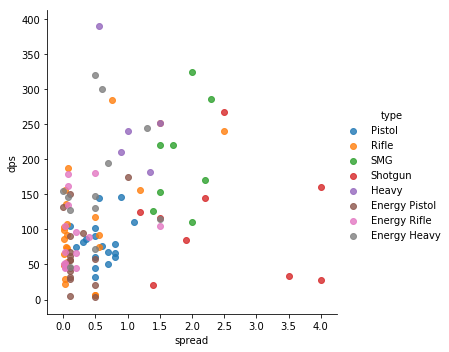

In [56]:
%matplotlib inline
import seaborn as sns
# combined_table['type_id'] = combined_table['type'].astype('category').cat.codes
# combined_table.plot.scatter(x='spread',  y='dps', c='type_id', colormap='viridis')
# combined_table.plot.scatter(x='spread',  y='dps', c='type')
sns.lmplot('spread', 'dps', data=combined_table.dropna(), hue='type', fit_reg=False)

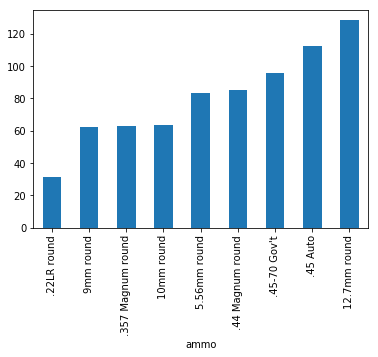

In [14]:
%matplotlib inline
pistol_table.pivot(columns='ammo', values='dps').mean().sort_values().plot.bar()